In [1]:
import numpy as np
import os

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from Data.Dataset import LatentFMRIDataset
import matplotlib.pyplot as plt

Data directories

In [2]:
data_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_UM1_merged'
test_ratio = 0.15

[LibSVM]......................*.........*
optimization finished, #iter = 31683
obj = -297.436476, rho = -0.858656
nSV = 189, nBSV = 2
Total nSV = 189


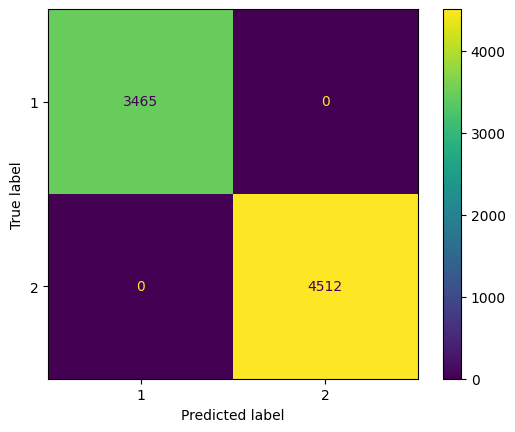

In [3]:

dataset = LatentFMRIDataset(data_dir=data_directory)
all_data_items = dataset.get_all_items()
X = all_data_items['X']
y = all_data_items['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

model = SVC(kernel='linear', C=10.0, class_weight='balanced', random_state=42, verbose=True)
model.fit(X=X_train, y=y_train)

test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, test_predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()

In [4]:
tn, fp, fn, tp = cm.ravel()
metrics = {
    'accuracy': ((tp + tn) / (tp + tn + fp + fn + 1e-6)),
    'recall': (tp / (tp + fn + 1e-6)),
    'precision': (tp / (tp + fp + 1e-6))
}

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_transformed = pca.transform(X_train)

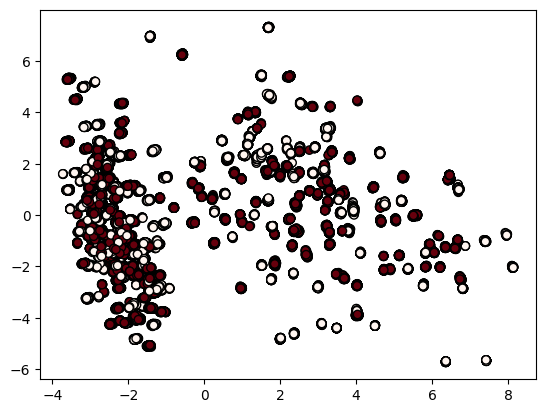

In [7]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap='Reds', edgecolor="k")

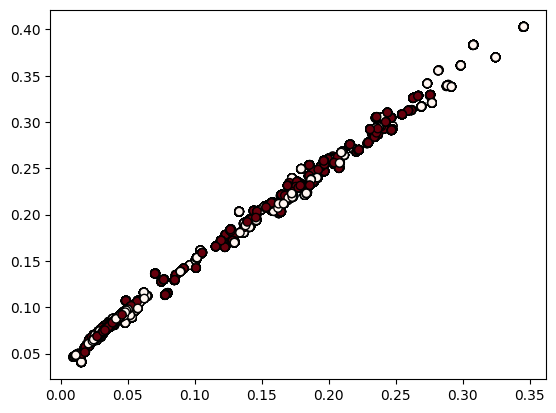

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Reds', edgecolor="k")

In [9]:
X_train[:, 0], X_train[:, 1]

(array([0.16250718, 0.03251028, 0.04798806, ..., 0.17877209, 0.13922858,
        0.04569447]),
 array([0.21159625, 0.07549739, 0.09554601, ..., 0.23139203, 0.1921705 ,
        0.09196103]))

In [10]:
X_test.shape

(7977, 1152)

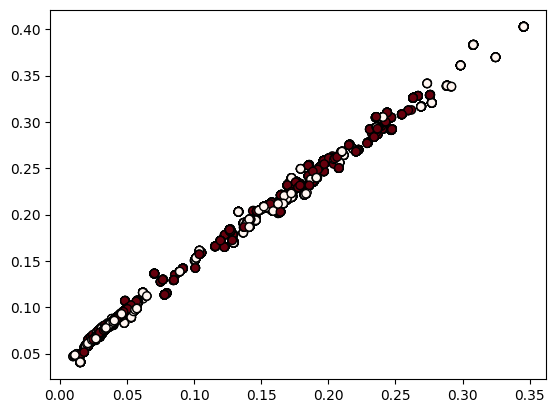

In [11]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='Reds', edgecolor="k")

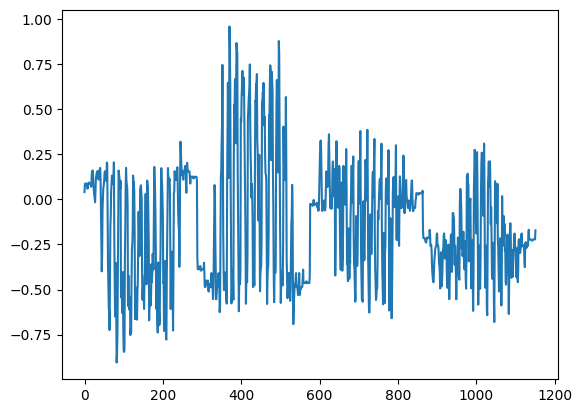

In [12]:
plt.plot(X_train[20000])

In [16]:
ones = dataset.get_items_from_class(cls=1)
twos = dataset.get_items_from_class(cls=2)
x_ones = ones['X']
x_twos = twos['X']

In [17]:
x_twos.shape, x_ones.shape

((30545, 4, 16, 18), (22630, 4, 16, 18))

In [21]:
import plotly.express as px
import pandas as pd

In [39]:
ones_df = pd.DataFrame(data=x_ones.reshape((x_ones.shape[0], -1)))
twos_df = pd.DataFrame(data=x_twos.reshape((x_twos.shape[0], -1)))

In [40]:
ones_df['label'] = np.ones(shape=len(ones_df))
twos_df['label'] = np.ones(shape=len(twos_df)) + 1


In [41]:
concatenated = pd.concat([ones_df, twos_df])
concatenated.tail()

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,label
30540,0.084965,0.129570,0.131407,0.135719,0.140176,0.126295,0.108931,0.105972,0.111986,0.124613,...,-0.214613,-0.208415,-0.205469,-0.205482,-0.205445,-0.205449,-0.205473,-0.205357,-0.144742,2.0
30541,0.084953,0.129552,0.131387,0.135696,0.140199,0.126388,0.108919,0.105982,0.111994,0.124626,...,-0.214630,-0.208436,-0.205507,-0.205517,-0.205481,-0.205482,-0.205507,-0.205391,-0.144766,2.0
30542,0.084873,0.129444,0.131273,0.135616,0.140210,0.126379,0.108782,0.105808,0.111877,0.124598,...,-0.214671,-0.208478,-0.205578,-0.205588,-0.205554,-0.205554,-0.205579,-0.205460,-0.144825,2.0
30543,0.084790,0.129333,0.131160,0.135539,0.140224,0.126322,0.108593,0.105597,0.111708,0.124542,...,-0.214733,-0.208541,-0.205662,-0.205672,-0.205639,-0.205640,-0.205665,-0.205544,-0.144896,2.0
30544,0.084754,0.129287,0.131117,0.135512,0.140243,0.126248,0.108415,0.105482,0.111568,0.124481,...,-0.214804,-0.208612,-0.205729,-0.205737,-0.205705,-0.205707,-0.205732,-0.205610,-0.144949,2.0


In [42]:
concatenated.reset_index(drop=True, inplace=True)

In [52]:
fig = px.parallel_coordinates(concatenated['0', '1', '2'], color='label')
plt.show()

In [38]:
concatenated[concatenated.index.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,label
0,0.041343,0.086993,0.086968,0.087077,0.089126,0.088470,0.079781,0.080481,0.088494,0.090580,...,-0.236390,-0.233868,-0.232419,-0.232367,-0.232441,-0.232437,-0.232438,-0.232527,-0.179509,2.0
1,0.033532,0.077548,0.077556,0.078132,0.082508,0.086071,0.090096,0.088793,0.077565,0.066647,...,-0.244834,-0.242939,-0.241905,-0.242281,-0.242439,-0.242447,-0.242454,-0.242430,-0.186515,2.0
2,0.023901,0.064326,0.064397,0.064727,0.068601,0.073545,0.079201,0.077332,0.073243,0.075690,...,-0.250492,-0.249418,-0.246648,-0.246921,-0.247019,-0.247005,-0.247002,-0.246741,-0.191152,2.0
3,0.035034,0.079401,0.079408,0.079831,0.084114,0.086875,0.086177,0.074564,0.062125,0.065907,...,-0.243794,-0.238237,-0.236973,-0.236664,-0.236522,-0.236388,-0.236399,-0.236347,-0.182062,2.0
4,0.039909,0.086140,0.086157,0.086649,0.090633,0.092977,0.076009,0.067779,0.057755,0.078202,...,-0.254236,-0.256120,-0.254583,-0.253693,-0.253767,-0.253810,-0.253814,-0.253788,-0.193628,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22625,0.020990,0.058109,0.059339,0.063817,0.066061,0.063488,0.052448,0.037233,0.039431,0.055561,...,-0.236349,-0.235285,-0.230072,-0.228596,-0.228465,-0.228402,-0.228433,-0.228311,-0.176427,2.0
22626,0.021025,0.058155,0.059382,0.063878,0.066135,0.063531,0.052407,0.037116,0.039408,0.055555,...,-0.236429,-0.235311,-0.230071,-0.228607,-0.228474,-0.228413,-0.228444,-0.228322,-0.176434,2.0
22627,0.020987,0.058110,0.059340,0.063851,0.066118,0.063575,0.052351,0.036991,0.039310,0.055465,...,-0.236495,-0.235348,-0.230088,-0.228642,-0.228510,-0.228450,-0.228481,-0.228358,-0.176463,2.0
22628,0.020900,0.057998,0.059234,0.063754,0.066004,0.063602,0.052324,0.036968,0.039230,0.055352,...,-0.236466,-0.235329,-0.230088,-0.228653,-0.228520,-0.228460,-0.228492,-0.228367,-0.176477,2.0
